In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/Breast_Ultrasound_Images/BreastUltrasound_images_filtered.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/Breast_Ultrasound_Images/BreastUltrasound_masks_filtered.npy')

In [3]:
images.shape

(706, 512, 512, 1)

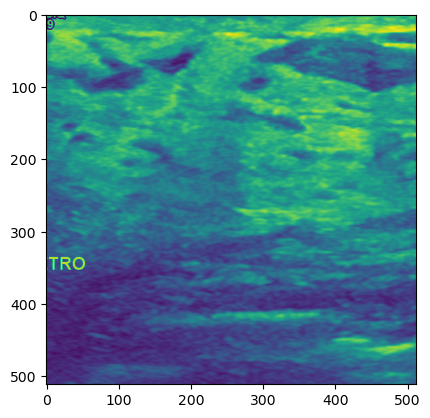

In [4]:
imshow(images[100])

In [5]:
masks.shape

(706, 512, 512, 1)

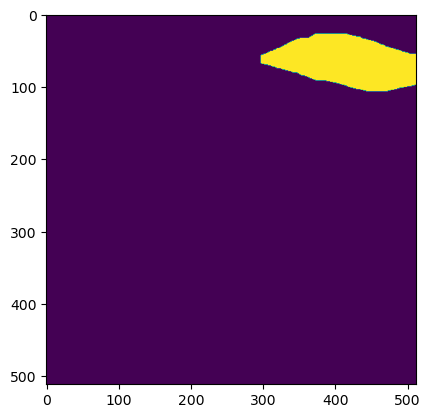

In [6]:
imshow(masks[100])

In [7]:
import sys
sys.path.append('../')
import gp2

In [8]:
from keras import losses

In [9]:
loss_fx = losses.BCE

In [10]:
C = gp2.KUC_UNetPlus2D(loss=loss_fx)

*** GP2  KUC UNetPlus2D ***
Working directory: /tmp/tmpyli5cgjbkuc_unetplus2d


In [11]:
hist = C.train(images[0:500], masks[0:500], images[500:706], masks[500:706], batch_size=16, patience_counter=4)

Epoch 1/100
32/32 [==============================] - 20s 389ms/step - loss: 0.6701 - dice_coeff: 0.1593 - val_loss: 0.5095 - val_dice_coeff: 0.2057
Epoch 2/100
32/32 [==============================] - 8s 254ms/step - loss: 0.3633 - dice_coeff: 0.0919 - val_loss: 0.5050 - val_dice_coeff: 0.1186
Epoch 3/100
32/32 [==============================] - 8s 248ms/step - loss: 0.3314 - dice_coeff: 0.0933 - val_loss: 0.5290 - val_dice_coeff: 0.0991
Epoch 4/100
32/32 [==============================] - 8s 249ms/step - loss: 0.3225 - dice_coeff: 0.0959 - val_loss: 0.4737 - val_dice_coeff: 0.1413
Epoch 5/100
32/32 [==============================] - 8s 253ms/step - loss: 0.3090 - dice_coeff: 0.1252 - val_loss: 0.5386 - val_dice_coeff: 0.1409
Epoch 6/100
32/32 [==============================] - 8s 249ms/step - loss: 0.2957 - dice_coeff: 0.1331 - val_loss: 0.4791 - val_dice_coeff: 0.1971
Epoch 7/100
32/32 [==============================] - 8s 249ms/step - loss: 0.2911 - dice_coeff: 0.1411 - val_loss: 0.

In [12]:
def visualize_predictions(model, images, masks, num_samples=100):
    for i in range(num_samples):
        x_val, y_val = images[i], masks[i]
        y_pred, _ = model.predict(x_val[np.newaxis, ...], y_val[np.newaxis, ...])

        # Draw the input image, true mask, and predicted mask
        fig, ax = plt.subplots(nrows=1, ncols=3)
        
        ax[0].imshow(x_val)
        ax[0].title.set_text('Input Image')

        ax[1].imshow(y_val.squeeze(), cmap='gray')
        ax[1].title.set_text('True Mask')

        ax[2].imshow(y_pred.squeeze(), cmap='gray')
        ax[2].title.set_text('Predicted Mask')

        plt.show()

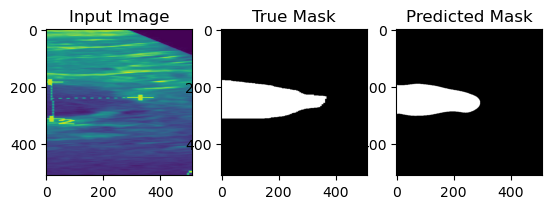

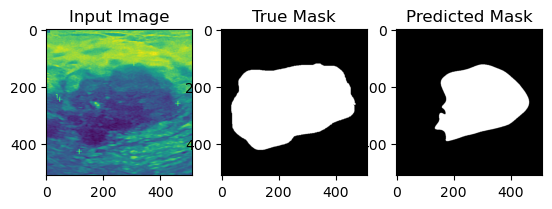

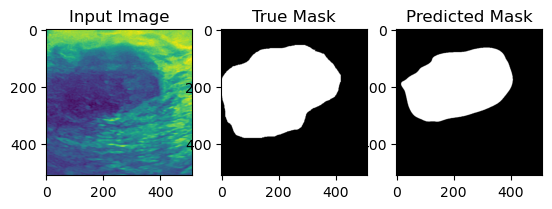

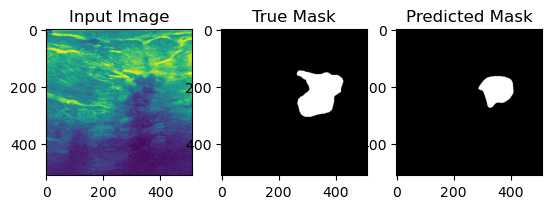

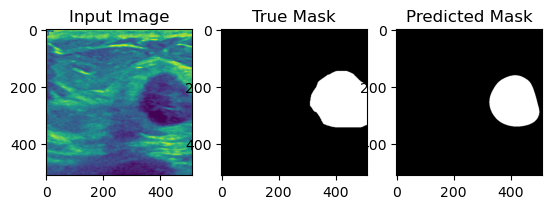

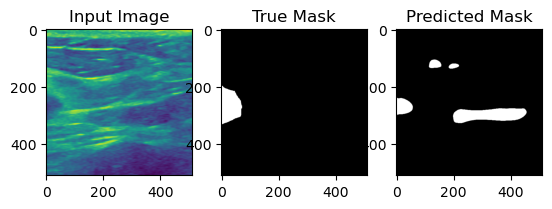

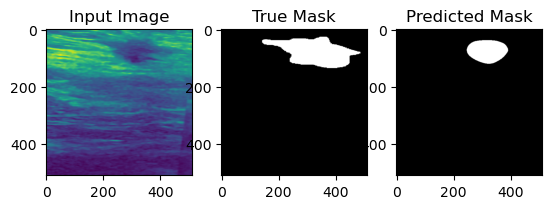

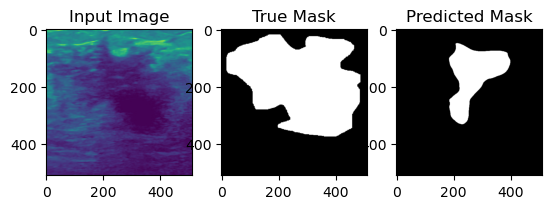

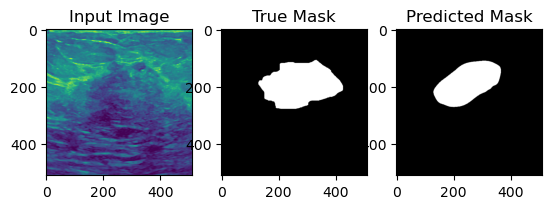

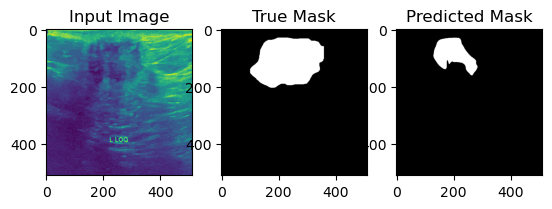

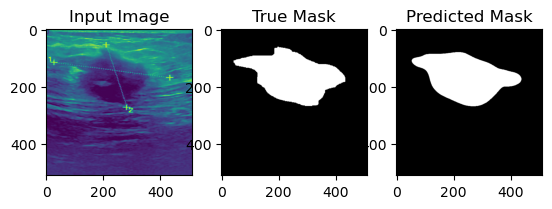

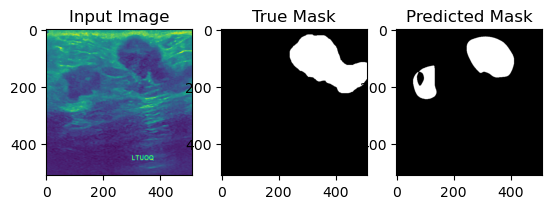

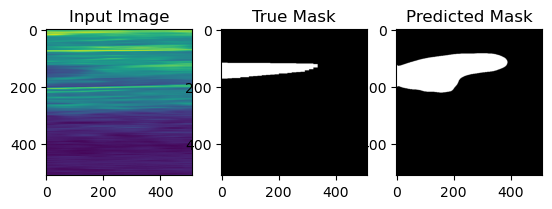

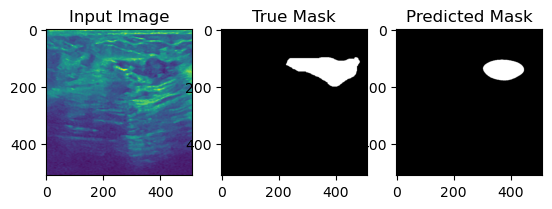

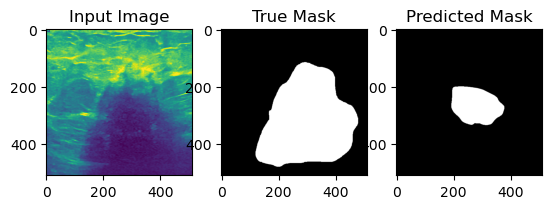

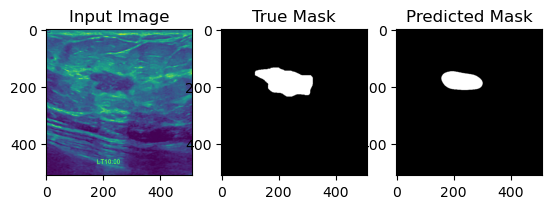

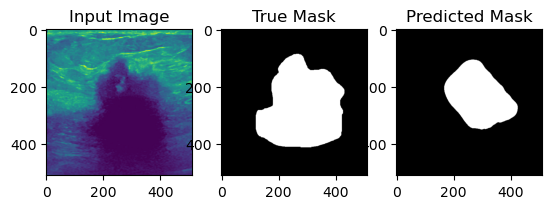

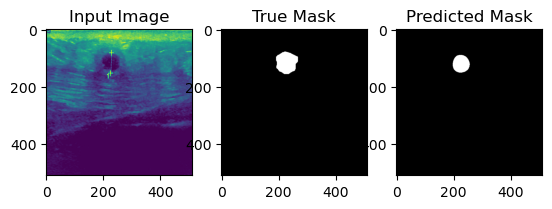

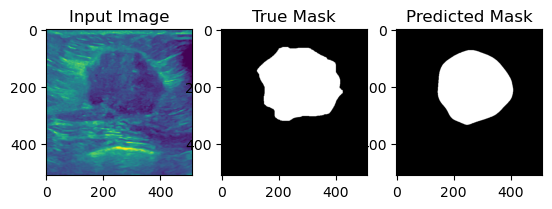

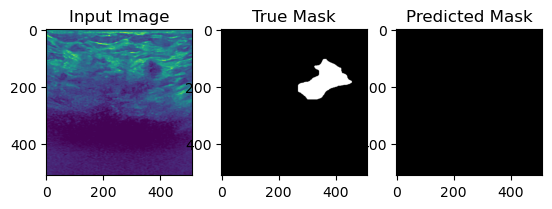

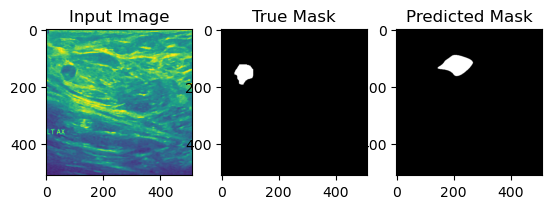

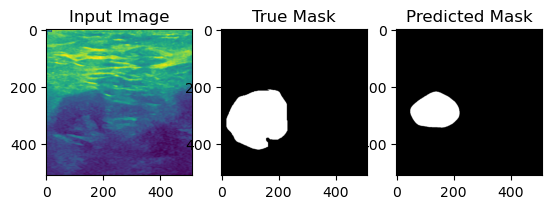

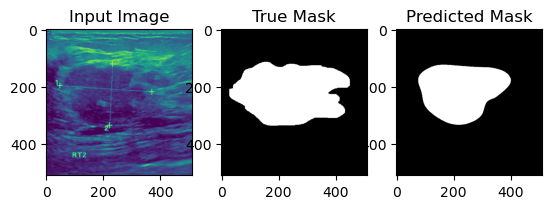

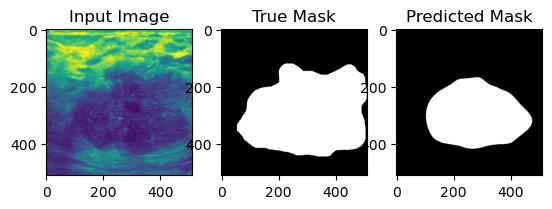

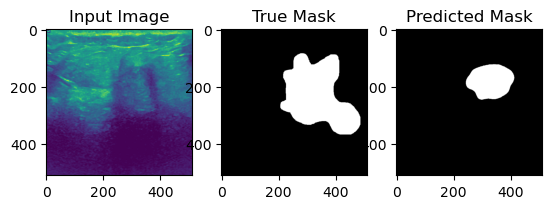

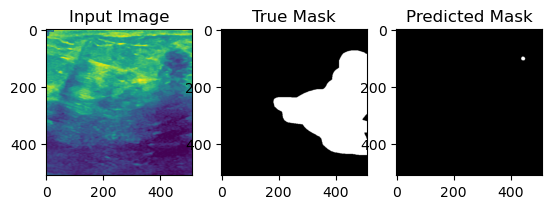

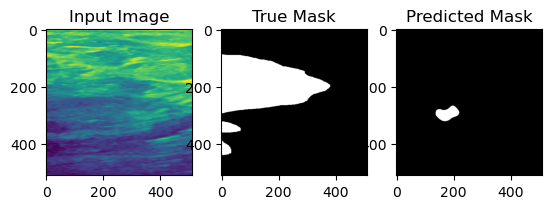

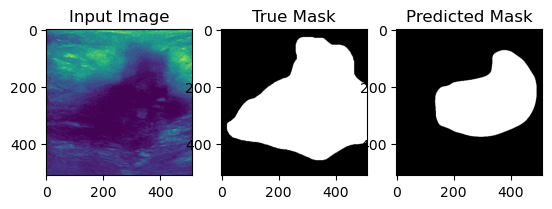

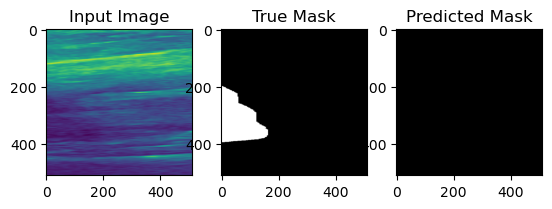

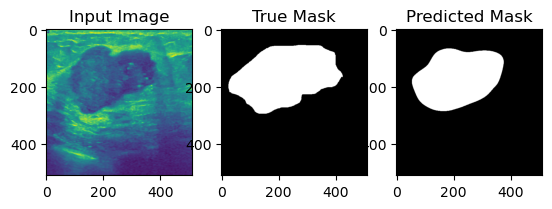

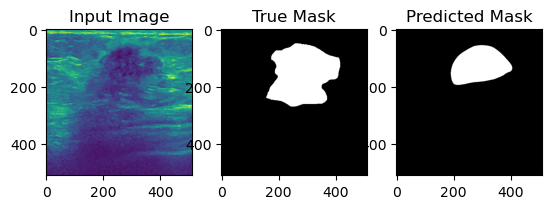

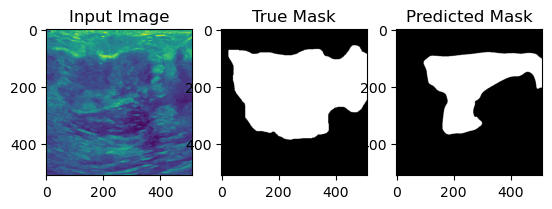

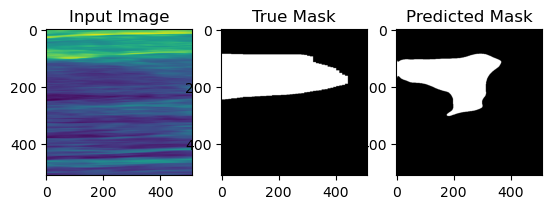

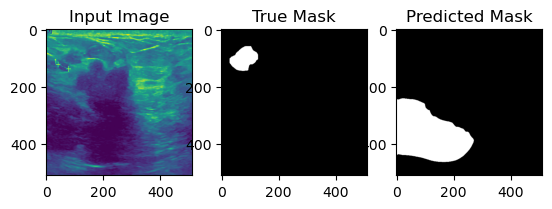

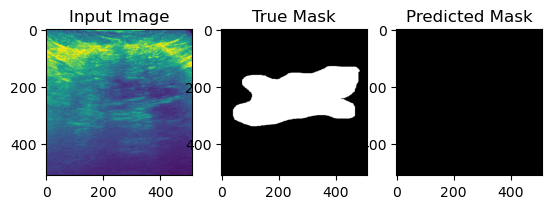

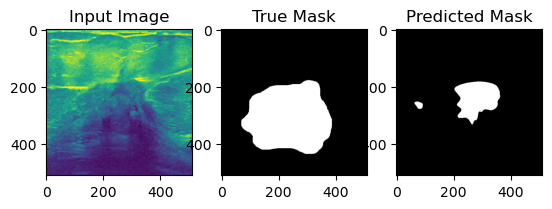

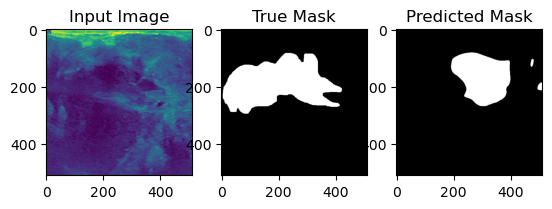

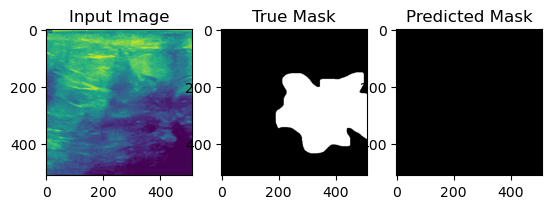

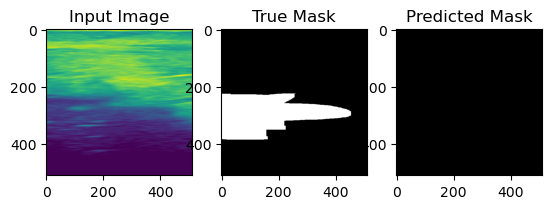

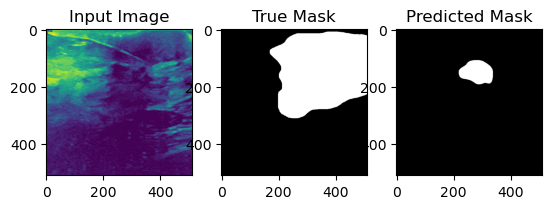

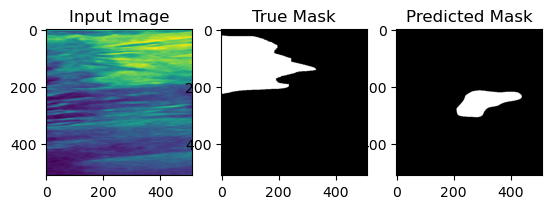

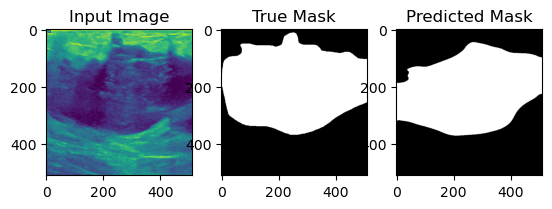

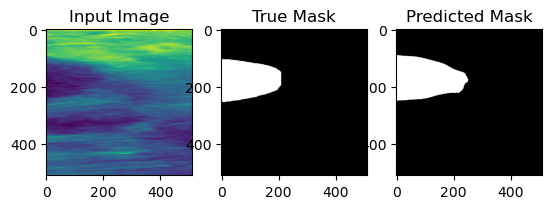

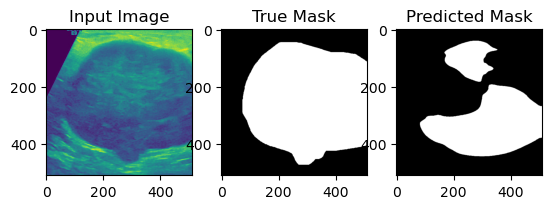

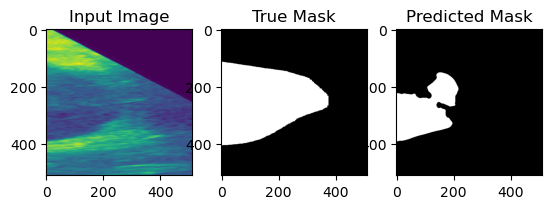

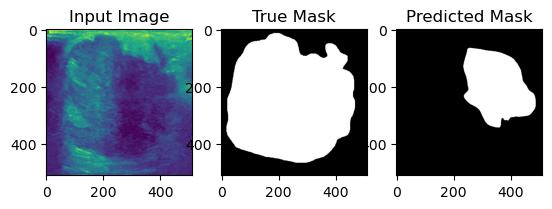

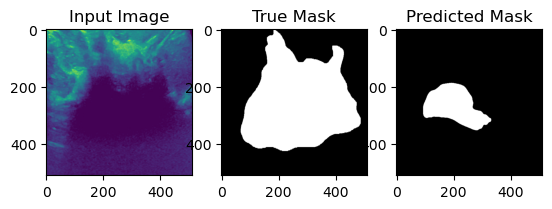

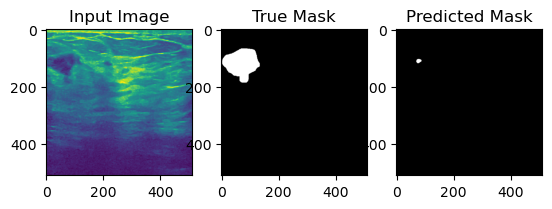

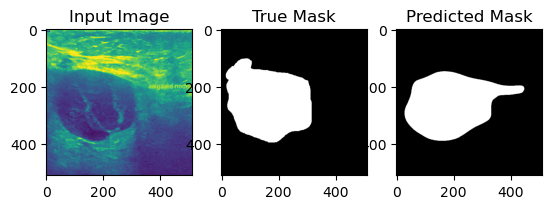

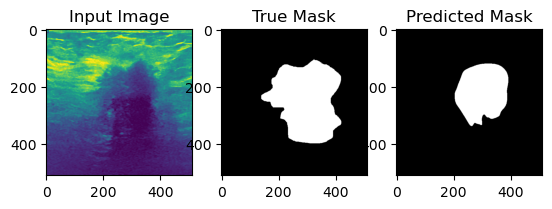

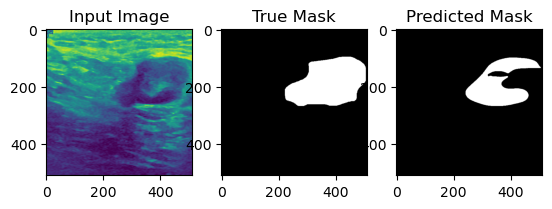

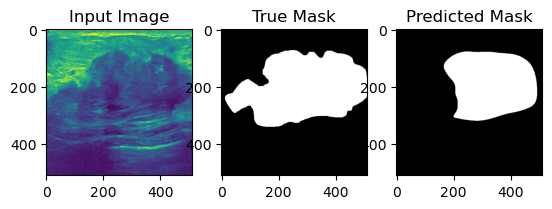

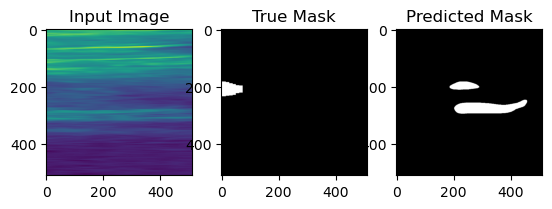

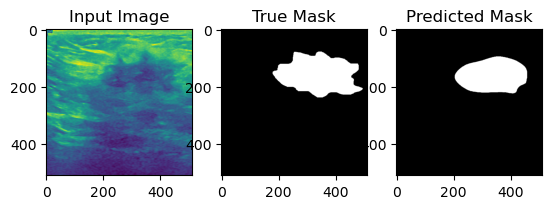

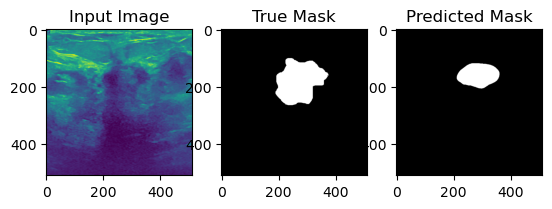

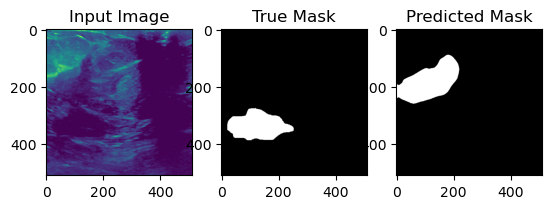

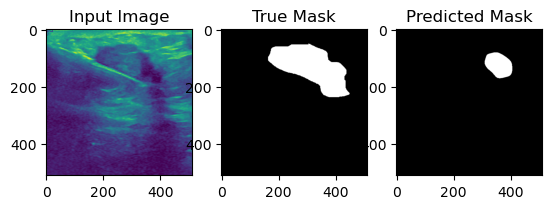

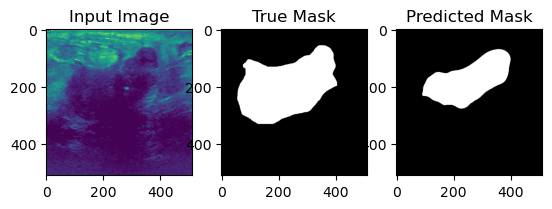

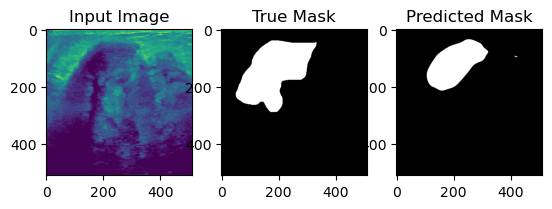

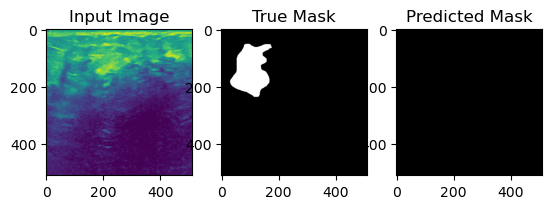

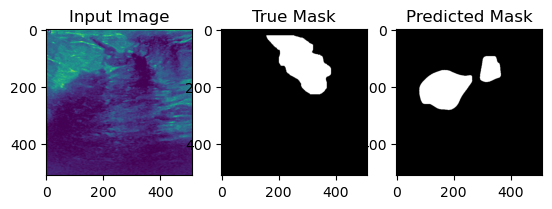

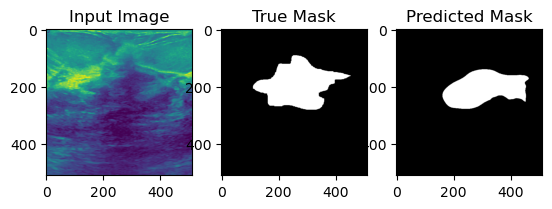

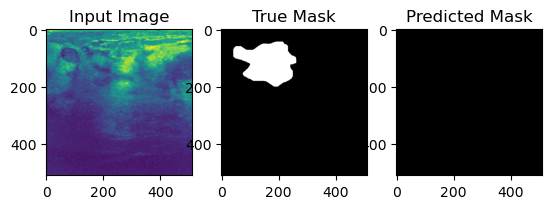

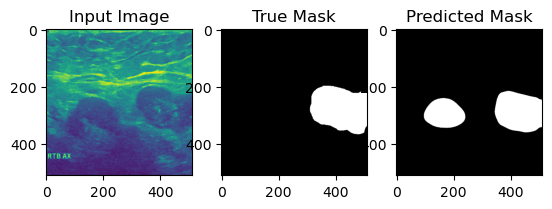

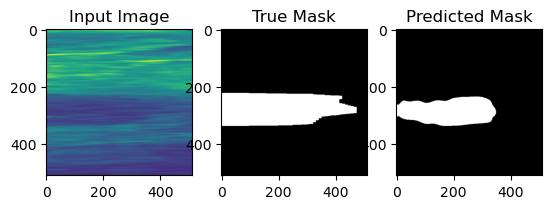

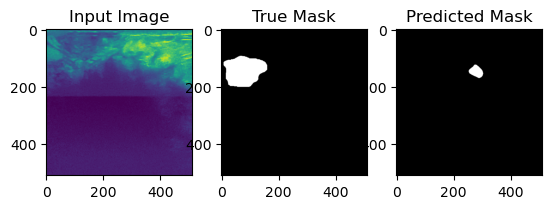

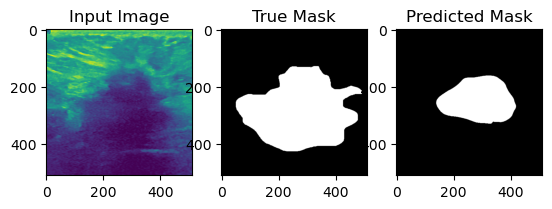

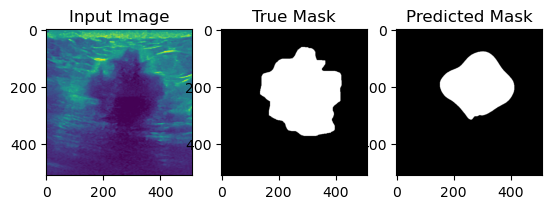

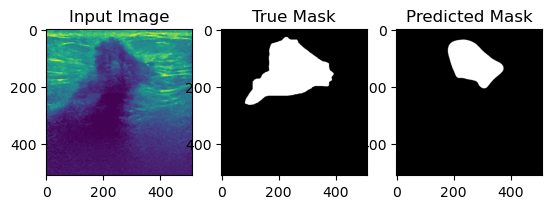

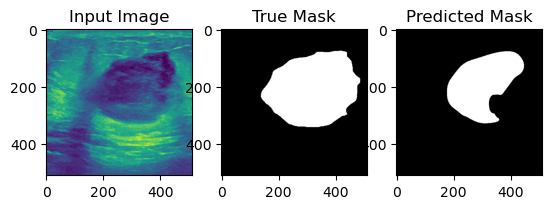

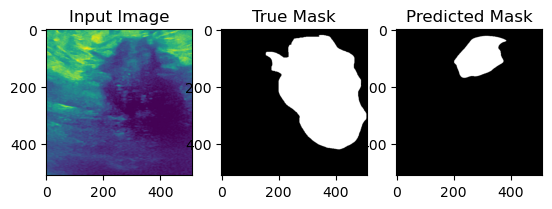

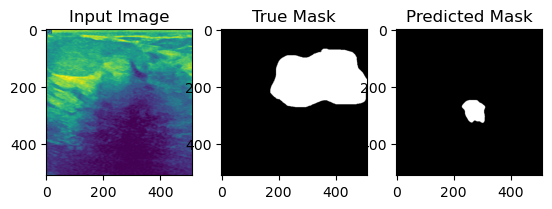

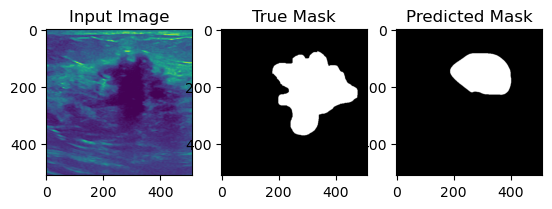

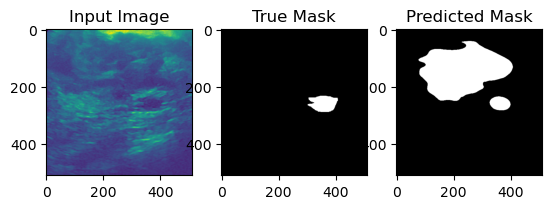

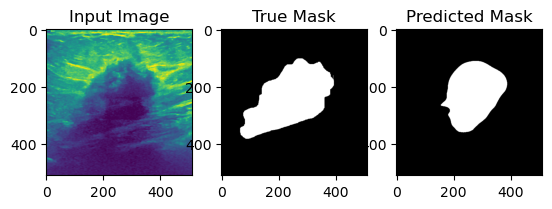

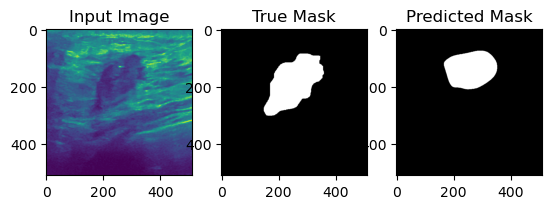

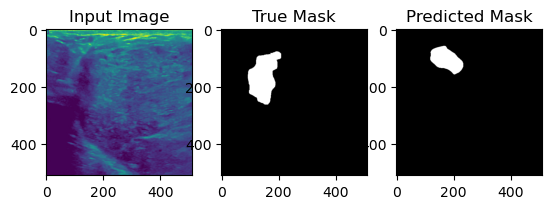

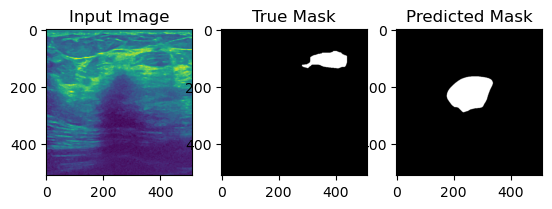

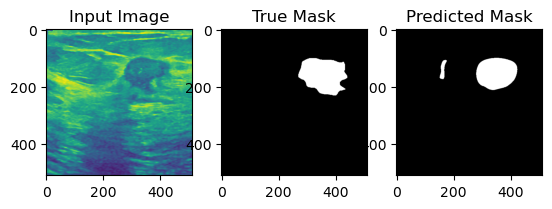

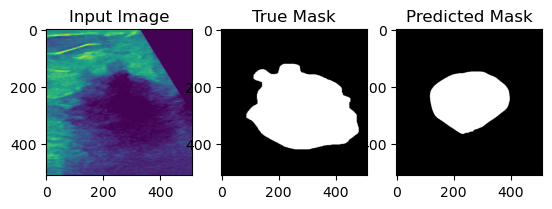

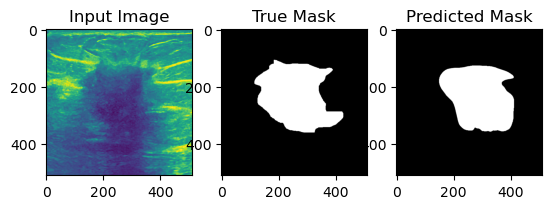

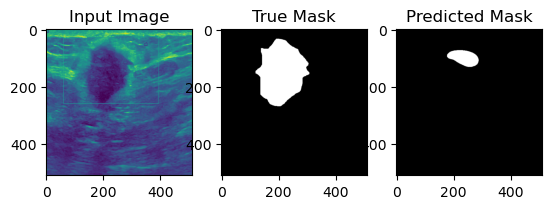

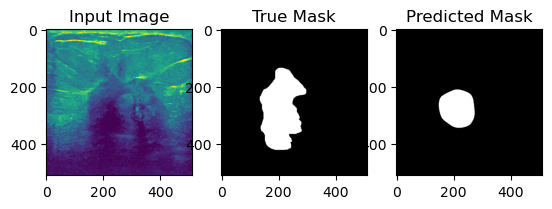

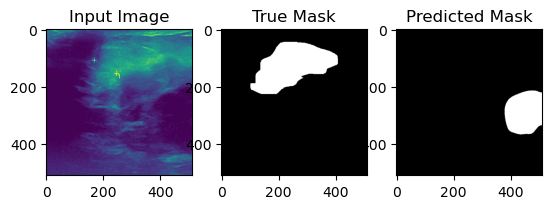

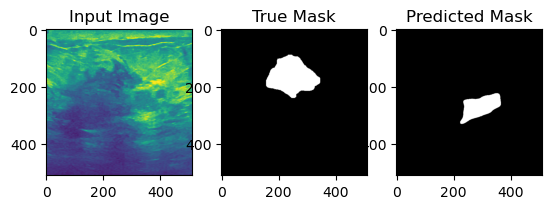

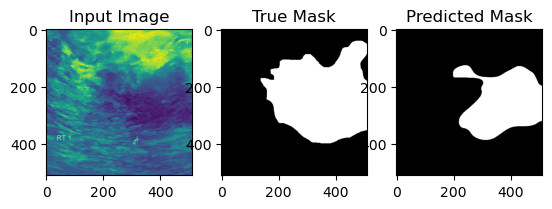

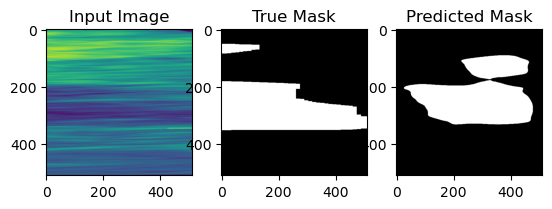

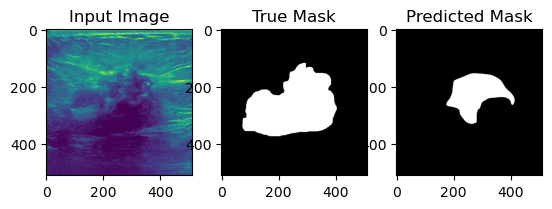

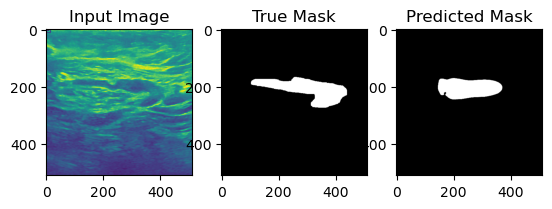

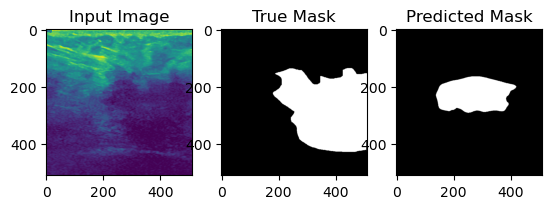

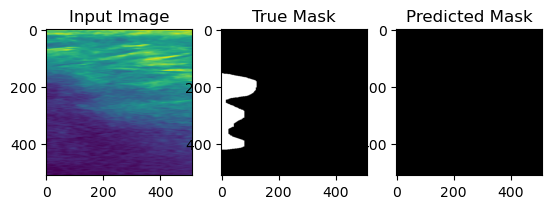

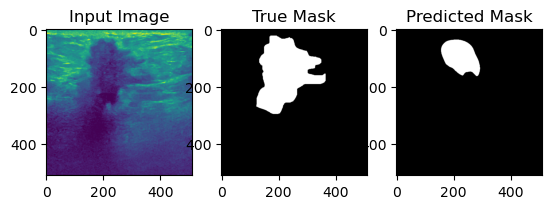

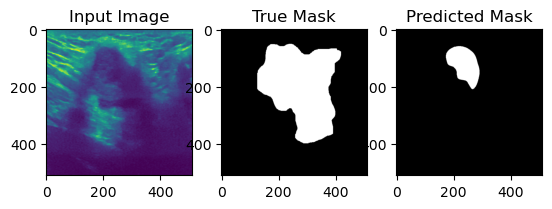

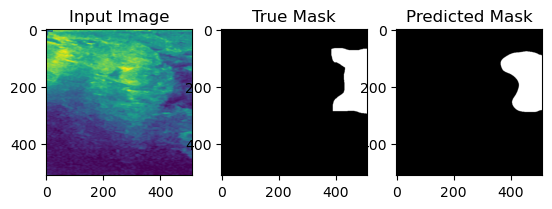

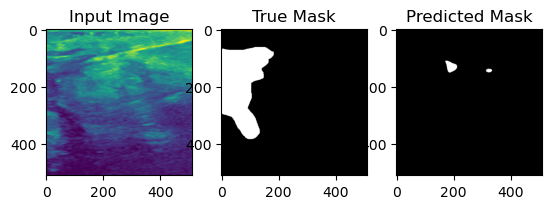

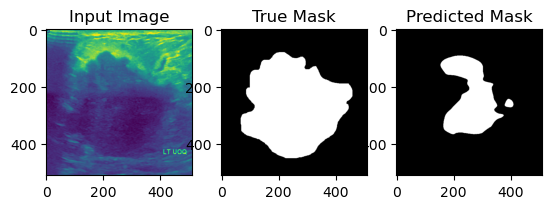

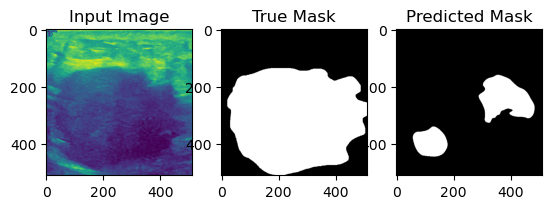

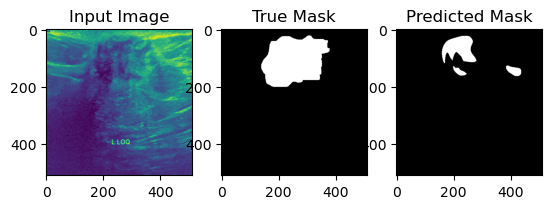

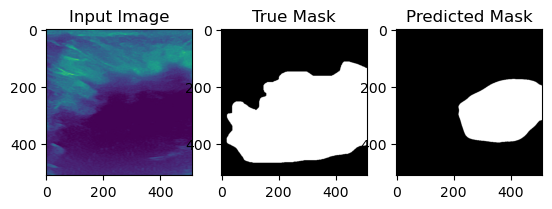

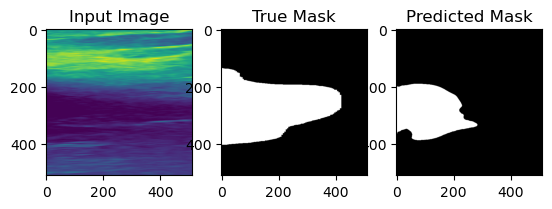

In [13]:
visualize_predictions(C,images[500:706], masks[500:706], num_samples=100)